**Closed Box Model**

We want a model that describes all the physical variables in a galaxy surrounded by a dark matter halo: if we set the mass of gas tranfered between the galaxy and the halo equal to zero, what we obtain is called the "closed box model"

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import scipy
from astropy.table import Table
#!pip install pandas
import pandas

In [2]:
data=Table.read('SDSS_LAB2024_CIGALEresults.fits', format = 'fits')
data=data.to_pandas()
mass_bayes=np.array(data.loc[:,"bayes_stellar_m_star"])
sfr_bayes=np.array(data.loc[:,"bayes_sfh_sfr"])
sfr_err_bayes=np.array(data.loc[:,"bayes_sfh_sfr_err"])
age_bayes=np.array(data.loc[:,"bayes_sfh_age"])
tau_bayes=np.array(data.loc[:,"bayes_sfh_tau_main"])

mass_best=np.array(data.loc[:,"best_stellar_m_star"])
sfr_best=np.array(data.loc[:,"best_sfh_sfr"])
#sfr_err_best=np.array(data.loc[:,"best_sfh_sfr_err"])
age_best=np.array(data.loc[:,"best_sfh_age"])
tau_best=np.array(data.loc[:,"best_sfh_tau_main"])

In the next cell we compute or set the varibales we need to obtain the model; we need the dynamical timescale, the parameter epsilon, the gas mass, the galaxy mass and the sSFR

In [3]:
t_dyn=2*10**7
epsilon_sfr = 0.02
epsilon = epsilon_sfr/t_dyn
m_gas=10**10
age= np.array([1,2,3,4,5])
m_star_model = m_gas*(1-np.exp(-epsilon*age*10**9))
sSFR_model = epsilon*(np.exp(-epsilon*age*10**9)/(1-np.exp(-epsilon*age*10**9)))


Now we want to find the better data between bayes and best, comparing the plots of sSFR in function of the galaxy mass. Then we also set some different galaxy ages and compute the sSFR model assuming that age (horizontal lines). 

<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/var/folders/lx/nx_0fbmn2xxcrxcn7tmrlntm0000gn/T/ipykernel_2490/2457710391.py:20: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')


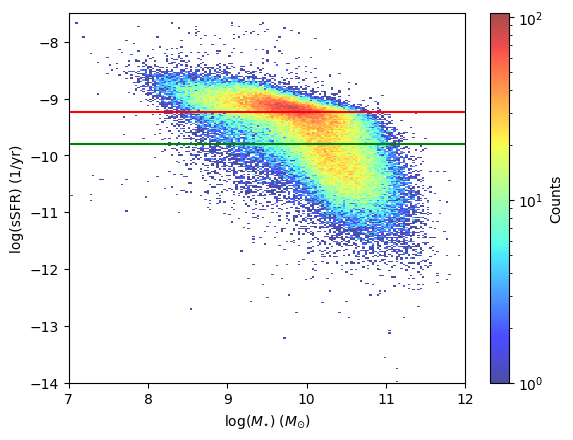

In [4]:
MASS_bayes = np.log10(mass_bayes)
SFR_bayes = np.log10(sfr_bayes)
sSFR_data_bayes = SFR_bayes - MASS_bayes

#Visualize the data
def const(x, a):
    return 0*x+a
import matplotlib
color = ["red", "orange", "green", "blue", "black"]
#plt.scatter(MASS_bayes, sSFR_data_bayes, marker='.', s=7, alpha = 0.05)
plt.hist2d(MASS_bayes, sSFR_data_bayes, bins=(300,300), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet, alpha=0.7)
plt.colorbar(label='Counts')
#for i in range(np.size(age)):
plt.axhline(np.log10(sSFR_model[0]), color = color[0])
plt.axhline(np.log10(sSFR_model[1]), color = color[2])

#plt.plot(MASS_bayes, const(MASS_bayes, -9.73), color = 'green')
plt.ylim(-14,-7.5)
plt.xlim(7,12)
plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('log(sSFR) (1/yr)')

#plt.grid()
plt.show()

In [5]:
print(np.log10(sSFR_model[0]))
print(np.log10(sSFR_model[1]))

-9.23509439727547
-9.805436701459588


<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/var/folders/lx/nx_0fbmn2xxcrxcn7tmrlntm0000gn/T/ipykernel_2490/963664452.py:18: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')


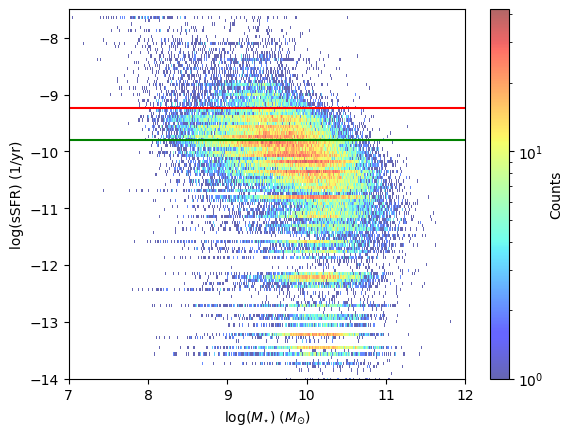

In [6]:
MASS_best = np.log10(mass_best)
SFR_best = np.log10(sfr_best)
sSFR_data_best= SFR_best - MASS_best

#Visualize the data

#plt.scatter(MASS_best, sSFR_data_best, marker='.', s=7, alpha = 0.1)
plt.hist2d(MASS_best, sSFR_data_best, bins=(1000,4000), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet, alpha=0.6)
plt.colorbar(label='Counts')
#plt.axhline(np.log10(sSFR_best), color='red')
#for i in range(np.size(age)):
#    plt.axhline(np.log10(sSFR_model[i]), color = color[i])
plt.axhline(np.log10(sSFR_model[0]), color = color[0])
plt.axhline(np.log10(sSFR_model[1]), color = color[2])
#plt.plot(MASS_best, const(MASS_best, -9.73), color = 'green')
plt.ylim(-14,-7.5)
plt.xlim(7,12)
plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('log(sSFR) (1/yr)')

#plt.grid()
plt.show()

We know that the main sequence of galaxy is related with a sSFR of about -9, so the best plot is the bayes one because the red color (that means an high amount of galaxies) is mainly in the region with a sSFR of -9. 

We also want to know why there is a spread of the sSFR to the lower right of the plot, so we set a mask that cut off the high mass galaxies and draw histograms for bayes and best

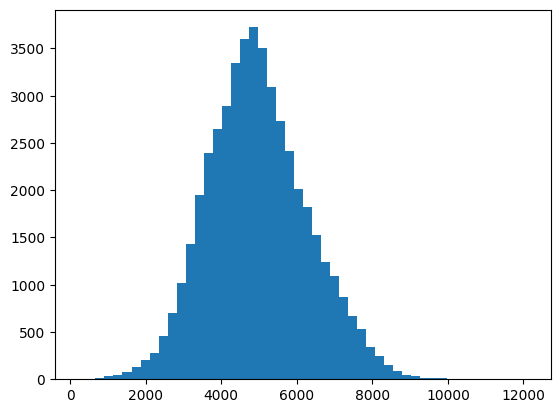

In [7]:
mask = MASS_bayes > 10
m = MASS_bayes[mask] 
age_masked = age_bayes[mask]
plt.hist(age_masked, 50)
plt.show()

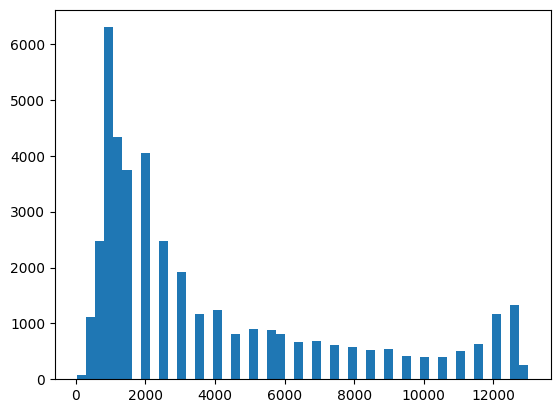

In [8]:
mask1 = MASS_best > 10
m1 = MASS_best[mask1] 
age_masked1 = age_best[mask1]
plt.hist(age_masked1, 50)
plt.show()

Per masse sopra 10^10 abbiamo uno spread di age elevate che ci giustificano lo spread di sfr in basso a destra

### Now a more precised closed box model

We found the relation to express the radius and the velocities as a function of the stellar mass. 
This way we can express tdyn as a function of the mass, and the model depends only on this variable.

In [9]:
a = 3.6
b = 10.5
v_ref = 242
v_circ = ((MASS_best/10**b)**(1/a))*v_ref

A = 10**0.70
alpha = 0.22
R_eff = A*(MASS_best/(5*10**10))**alpha

t_dyn = 2*10**7*(R_eff/4)*(v_circ/200)**(-1)

epsilon_sfr = 0.02
epsilon = epsilon_sfr/t_dyn
m_gas=10**10
age= np.array([1,2,3,4,5])
sSFR_model = np.zeros((5, len(t_dyn)))
m_star_model = np.zeros((5, len(t_dyn)))
for i in range(len(age)):
    m_star_model[i,:] = m_gas*(1-np.exp(-epsilon*age[i]*10**9))
    sSFR_model[i,:] = epsilon*(np.exp(-epsilon*age[i]*10**9)/(1-np.exp(-epsilon*age[i]*10**9)))
#print(t_dyn)
#print(epsilon)
#sSFR_model


Now let's see how the model describes the data

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/var/folders/lx/nx_0fbmn2xxcrxcn7tmrlntm0000gn/T/ipykernel_2490/1244272105.py:15: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


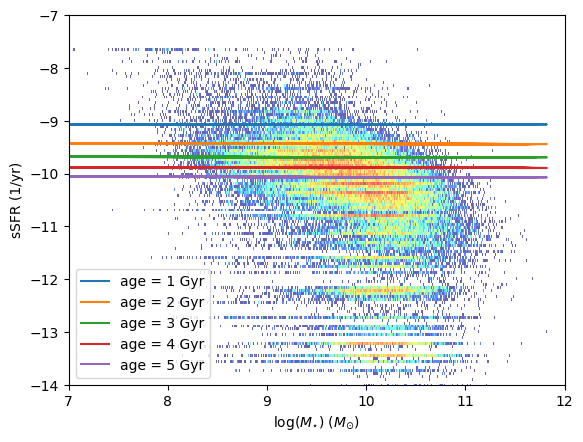

In [10]:
MASS_best = np.log10(mass_best)
SFR_best = np.log10(sfr_best)
sSFR_data_best= SFR_best - MASS_best

#Visualize the data

#plt.scatter(MASS_best, sSFR_data_best, marker='.', s=7, alpha = 0.1)
plt.hist2d(MASS_best, sSFR_data_best, bins=(1000,4000), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet, alpha=0.6)
#plt.axhline(np.log10(sSFR_best), color='red')
for i in range(np.size(age)):
    plt.plot(MASS_best, np.log10(sSFR_model[i,:]), label="age = "+str(age[i])+" Gyr")
#plt.plot(MASS_best, const(MASS_best, -9.73), color = 'green')
plt.ylim(-14,-7)
plt.xlim(7,12)
plt.xlabel('log($M_{\star}$) ($M_{\odot}$)')
plt.ylabel('sSFR (1/yr)')

#plt.grid()
plt.legend()
plt.show()

The model remains constant (as before, even if the values slightly change)! --> we need to open the model